# Виктор Воробьев 
# Проект - Анализ данных на основе датасета: Prediction of the Churn of clients

Данный датасет содержит в себе набор количественных и категориальных данных о пользователях, которые перестали пользоваться услугами одной вымышленной интернет-компании ,данный датасет был взят из kaggle,также там есть некоторые параметры ,например :

Есть количественные данные:
* 'ClientPeriod',
* 'MonthlySpending',
* 'TotalSpent'

Есть категориальные данные:
* 'Sex'
* 'IsSeniorCitizen'
* 'HasPartner'
* 'HasChild'
* 'HasPhoneService'
* 'HasMultiplePhoneNumbers'
* 'HasInternetService'
* 'HasOnlineSecurityService'
* 'HasOnlineBackup'
* 'HasDeviceProtection'
* 'HasTechSupportAccess'
* 'HasOnlineTV'
* 'HasMovieSubscription'
* 'HasContractPhone'
* 'IsBillingPaperless'
* 'PaymentMethod'


# Первая часть : исследование


Загрузим архив с необходимыми датасетами для анализа и тренировки 

In [114]:
!unzip /content/advanced-dls-spring-2021.zip

Archive:  /content/advanced-dls-spring-2021.zip
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Загрузим библиотеки для работы с нашими данными 

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt

Прочитаем наши датасеты ,а также решим проблему с восприятием TotalSpend не как числовые данные, написав для этого вспомогательную функцию Preprocess

In [116]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

def Preprocess(data):
    data["TotalSpent"] = pd.to_numeric(data["TotalSpent"], errors='coerce').fillna(0)
    return data
Preprocess(data)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Как видим ,мы решили проблему чтения TotalSpend и теперь он воспринимается как числовые данные(float64).

#Фильтрация и сортировка


В (подключение интернета) стоит "No", но в некоторых строках стоит "No internet service". Нужно заменить на 'No


In [121]:


# заменяем "No internet service" и на "No"
data.replace('No internet service','No', inplace=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


Посмотрим на статистику пользователей, у которых самые большие траты


Для наглядности и оптимальности нашей выборки ,возьмем 150 значений из генеральной совокупности

In [122]:
df_sortTotalSpent = data.sort_values('TotalSpent', ascending= False)[:150]


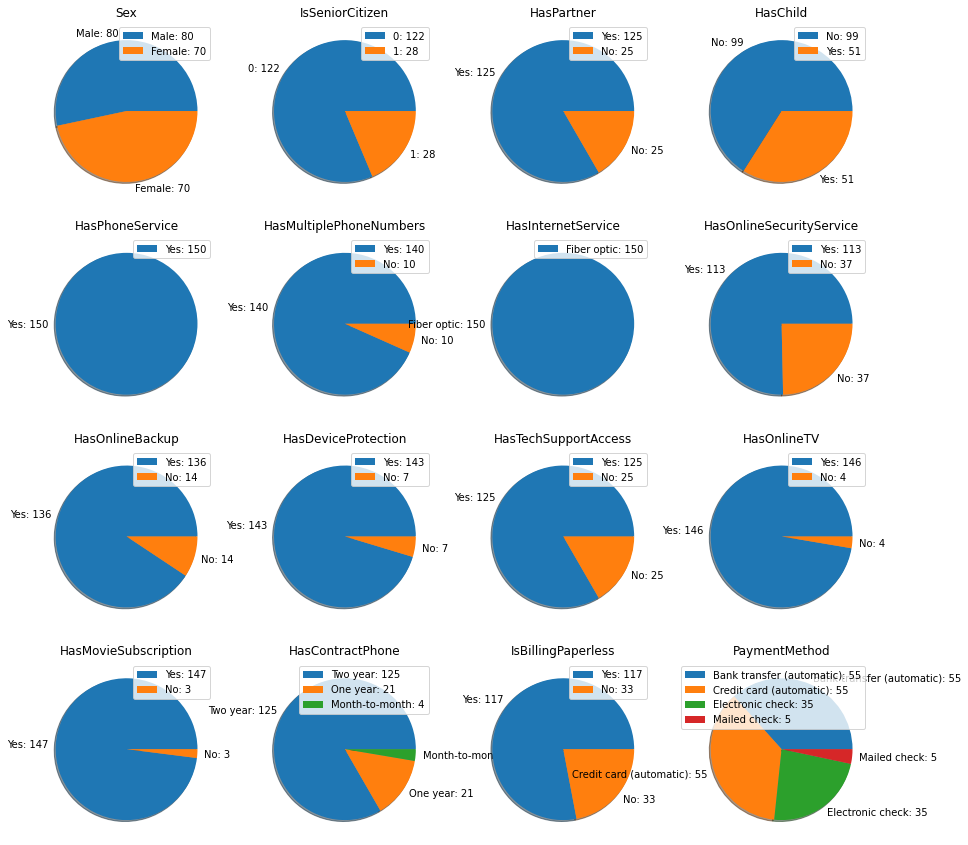

In [123]:
plt.figure(figsize = (15, 15))
for id, col in enumerate(cat_cols):
    ax = plt.subplot(4, 4, id + 1)
    plot_data = df_sortTotalSpent[col].value_counts().to_numpy()
    plot_labels = (df_sortTotalSpent[col].value_counts().index).astype(str) + ': ' + plot_data.astype(str)
    plt.pie(plot_data, labels = plot_labels, shadow = True)
    plt.title(col)
    plt.legend()

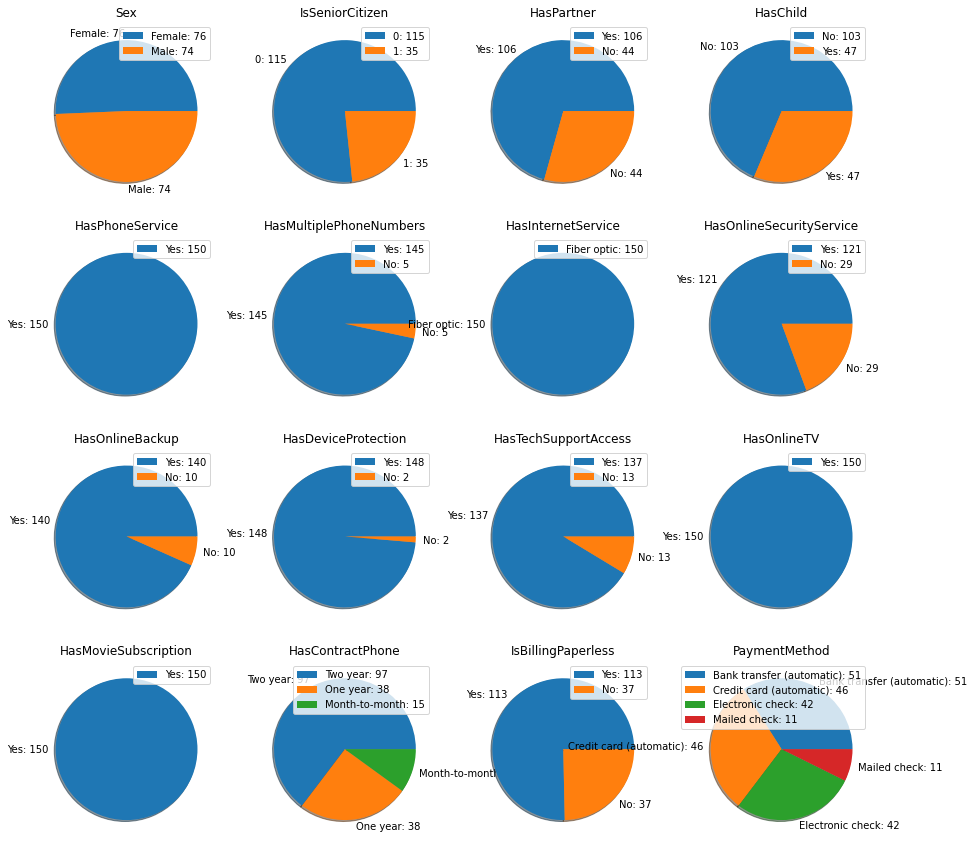

In [124]:
df_sortMonthlySpending = data.sort_values('MonthlySpending', ascending= False)[:150]

plt.figure(figsize = (15, 15))
for id, col in enumerate(cat_cols):
    ax = plt.subplot(4, 4, id + 1)
    plot_data = df_sortMonthlySpending[col].value_counts().to_numpy()
    plot_labels = (df_sortMonthlySpending[col].value_counts().index).astype(str) + ': ' + plot_data.astype(str)
    plt.pie(plot_data, labels = plot_labels, shadow = True)
    plt.title(col)
    plt.legend()

Как мы видем,на основе данных круговых диаграмм приведеных выше,мы можем сделать массу интересных выводов, что например люди в городе больше тратят денег на услуги данной интернет компании,также почти у всех них подключены почти все пакеты из тарифов ,что неудивительно,ведь это тоже сторонние траты

# Поработаем с выбросами:


Для того,чтобы подготовить наш датасет для дальнейшего использования и подготовки к задачам на линейную и логистическую регрессию, нужно провести ,для начала, визуальный анализ выбросов и в противном случае избавиться от них:

Для этого мы будем использовать график вида box and whisker. Далее мы построим его для всех числовых характеристик.

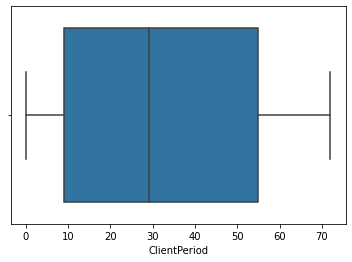

In [125]:
sns.boxplot(data['ClientPeriod'])


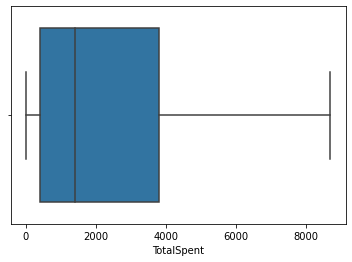

In [126]:
sns.boxplot(data['TotalSpent'])

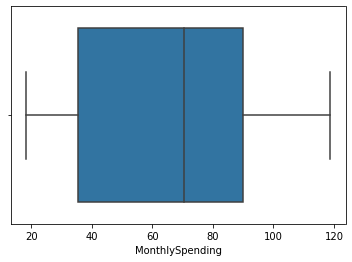

In [127]:
sns.boxplot(data['MonthlySpending'])

Как видим ,исходя из визуального анализа датасета на выбросы,их нет,поэтому можно принять решение о том,что более глубокий анализ с помощью межквартильных размахов и т.д не требуется.

# Попробуем найти некоторые статистические тенденции:

Построим и посмотрим некоторые гистограммы, на основе связи различных данных,таких как Sex,HasInternetService,HasMultiplePhoneNumbers,HasMovieSubscription

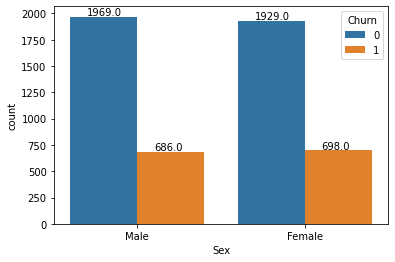

In [128]:

ax = sns.countplot(x = "Sex", data = data, hue = "Churn")
for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 15))

По данному графику ,можно сделать вывод о том,что мужчины и женщины в равных долях влияют на отток 

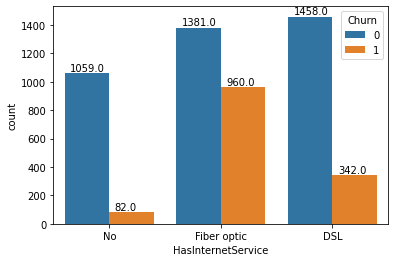

In [129]:

ax = sns.countplot(x = "HasInternetService", data = data, hue = "Churn")
for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()), (p.get_x() + 0.05, p.get_height() + 15))

Тут вывод таков ,что люди у которых проведено оптоволокно сильнее влияют на отток пользователей,что неудивительно,ведь многие услуги предлагаемой это компанией могут быть бесплатно заменены разными интернет-ресурсами

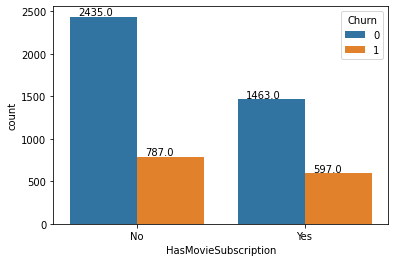

In [130]:

ax = sns.countplot(x = "HasMovieSubscription", data = data, hue = "Churn")
for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()), (p.get_x() + 0.05, p.get_height() + 15))

Здесь можно сделать вывод о том ,что люди не имеющие подписку на кино , чуть чаще отказываются от услуг данной компании

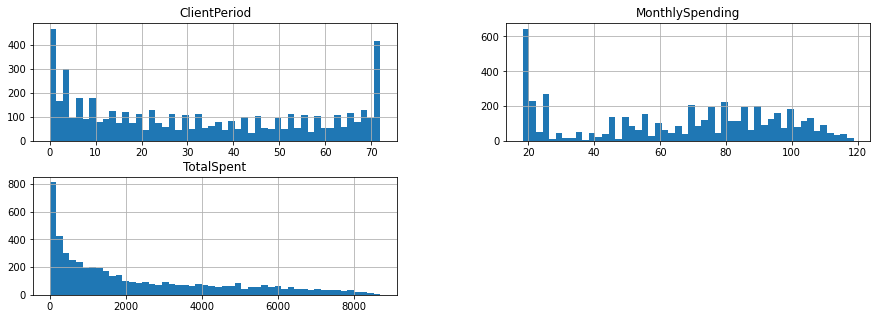

In [131]:

data[num_cols].hist(bins = 50, figsize = (15, 5))
None

Тут у нас просто распределение некоторых числовых признаков.

Как видно ранее,слепо построенные гистограммы и попытки найти какие то закономерности или тенденции особо ни к чему не привели ,поэтому перейдем к следующему пункту.

# Посмотрим Корреляции:


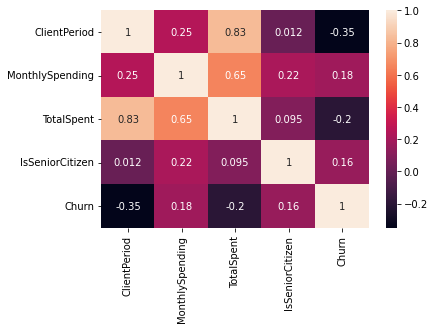

In [132]:
sns.heatmap(data.corr(),annot = True)

Исходя из построенного heatmap, мы можем сделать выводы о том ,что положительная корреляция у нас между параметрами TotalSpent и IsSeniorCitizen,что неудивительно,ведь люди в городах чаще пользуются услугами интернет-компаний.Также неплохие параметры показывают показатели MS И TS,что на самом деле и не удивительно.
Также, можно увидеть,что наиболее отрицательная корреляция между параметрами Churn и ClientPeriod ,что дает нам сделать вывод о том ,что это обратная зависимость

# Создание переменных

Мы возьмем количественный признак, и попытаемся сделать из него категориальный

In [133]:
data['TotalSpent'].describe()

count    5282.000000
mean     2287.486161
std      2269.049195
min         0.000000
25%       395.725000
50%      1405.650000
75%      3795.212500
max      8684.800000
Name: TotalSpent, dtype: float64

In [134]:
data['MonthlySpending'].describe()

count    5282.000000
mean       64.924754
std        30.176464
min        18.250000
25%        35.462500
50%        70.400000
75%        90.050000
max       118.750000
Name: MonthlySpending, dtype: float64

In [135]:
data['Mark_TotalSpent'] = data['TotalSpent'] //  20  # q - Кол-во оценок
# Мы объединяем клиентов в категории по их признаку TotalSpent
data['Mark_MonthlySpending'] = data['MonthlySpending'] // 20

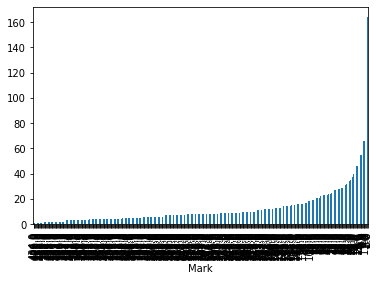

In [136]:
data['Mark_TotalSpent'].value_counts().sort_values().plot(kind = 'bar', xlabel = 'Mark')

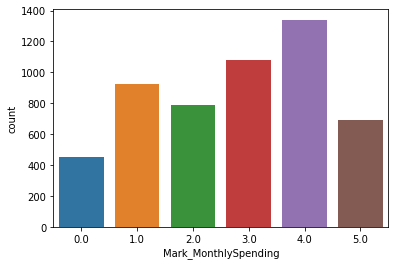

In [137]:
sns.countplot(x = 'Mark_MonthlySpending', data = data)

Для признака "MonthlySpending" у нас получился хороший категориальный признак, однако из-за большого разброса признака 'TotalSpent' признак может негативно действовать для дальнейшего анализа

# Группировка данных
Мы группируем данные по таргету и смотрим на статистики переменных, по которым можно найти важные признаки для прогнозов

In [27]:
target_df = data.groupby('Churn')

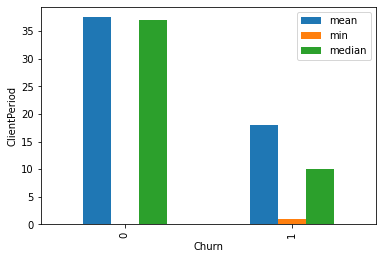

In [28]:
target_df.agg(['mean',  'min', 'median']).loc[:, num_cols[0]].plot(kind = 'bar',  ylabel = num_cols[0])

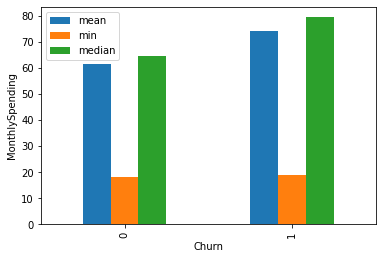

In [29]:
target_df.agg(['mean', 'min', 'median']).loc[:, num_cols[1]].plot(kind = 'bar', ylabel = num_cols[1])

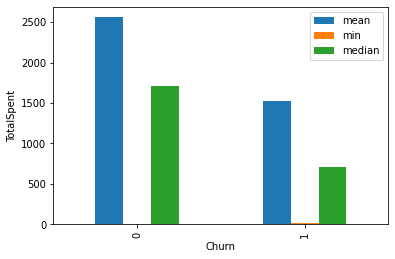

In [30]:
target_df.agg(['mean', 'min', 'median']).loc[:, num_cols[2]].plot(kind = 'bar', ylabel = num_cols[2]) 

По группировке данных и их визуализации можно выдвинуть гипотезу :  Чем больше клиент клиент тратит в месяц, тем вероятнее что он уйдет. Также чем дольше клиент пользуеться нашим продуктом, тем менее вероятнее он уйдет.

# Часть два


# Логистическая регрессия
## Линейная модель с функцией sigmoid на выходе

$$
p = \frac{1} {1 + {e^-}^y}
$$
Также в sklearn модель сразу идет с регуляризацией (штраф за большие веса)

Для прогнозирование сначала подготовим данные, используя стандартизацию и Label Encoding для категориальных признаков.



In [138]:
import warnings
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict

warnings.filterwarnings('ignore')

train_df = data[feature_cols]
target_df = data['Churn']

In [139]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for item in cat_cols:
  train_df[item] = le.fit_transform(train_df[item])

In [140]:
X_train, X_test, y_train, y_test = train_test_split(train_df,target_df, test_size = 0.2, random_state=42, shuffle = True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4225, 19) (4225,)
(1057, 19) (1057,)


In [141]:
from sklearn.preprocessing import StandardScaler
StandScaler = StandardScaler()
StandScaler.fit(X_train)

X_train = StandScaler.transform(X_train)
X_test = StandScaler.transform(X_test)

In [142]:
LogModel = LogisticRegression(random_state = 42)
LogModel.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Посмотрим на веса и важность наших признаков

In [143]:
coef = pd.DataFrame({'Coefs' : LogModel.coef_[0],
                    'Features' : feature_cols})

In [144]:
coef

,Coefs,Features
0,-1.394386,ClientPeriod
1,0.958164,MonthlySpending
2,0.613821,TotalSpent
3,-0.019687,Sex
4,0.114548,IsSeniorCitizen
5,0.026525,HasPartner
6,-0.084718,HasChild
7,-0.295134,HasPhoneService
8,0.096078,HasMultiplePhoneNumbers
9,-0.069777,HasInternetService


# Метрики


## Accuracy

In [145]:
from sklearn.metrics import accuracy_score, roc_auc_score,plot_roc_curve

In [146]:
ModelPredict = LogModel.predict(X_test)

In [147]:
print(f'Accuracy : {accuracy_score(ModelPredict, y_test)}')

Accuracy : 0.78240302743614


## ROC AUC

## У ROC_AUC есть особенность, если подавать целые ответы (0,1), то метрика будет меньше, чем метрика, если подавать вероятности

In [148]:
ModelPredict_proba = LogModel.predict_proba(X_test)[:, -1]

In [149]:
print(f'ROC_AUC если ответы - целое число : {roc_auc_score(y_test,ModelPredict)}')
print(f'ROC_AUC если ответы - вероятности: {roc_auc_score(y_test,ModelPredict_proba)}')

ROC_AUC если ответы - целое число : 0.6858082212022424
ROC_AUC если ответы - вероятности: 0.8279799780201513


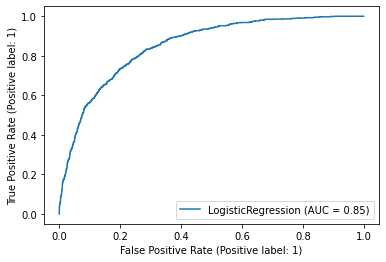

In [150]:
plot_roc_curve(LogModel,X_train, y_train)

Наша метрика будет площадью под этим графиком.

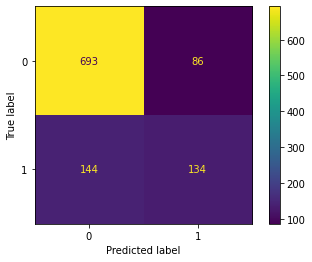

In [151]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LogModel,X_test, y_test)

Выше представлена матрица правильности предсказывания оттока клиентов. Как видим,левый верхний угол (True Positive) показывает довольно неплохие результаты, что дает нам сделать вывод о том ,что все верно 

# Линейная регрессия 

Будем предсказывать сколько пользователь тратит в месяц 

In [152]:
num_cols = [
    'ClientPeriod',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod',
    'Churn'
]
features_linReg = cat_cols + num_cols

In [153]:
train_df_linReg = data[features_linReg]

target_df_target = data['MonthlySpending']

In [154]:
for item in cat_cols:
  train_df_linReg[item] = le.fit_transform(train_df_linReg[item])

In [155]:
X_train, X_test, y_train, y_test = train_test_split(train_df_linReg,target_df_target, test_size = 0.2, random_state=42, shuffle = True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4225, 19) (4225,)
(1057, 19) (1057,)


In [156]:
StandScaler = StandardScaler()
StandScaler.fit(X_train)

X_train = StandScaler.transform(X_train)
X_test = StandScaler.transform(X_test)

In [157]:
LinModel = LinearRegression()
LinModel.fit(X_train, y_train)

LinearRegression()

In [158]:
LinModel.score(X_train, y_train)

0.8536648868371344

В коде выше мы учили нашу модель на всех признаках датасета и пытались предсказать ,сколько пользователь тратит в месяц ,в итоге мы получили довольно неплохой score(оценка эффективности предсказывания).

# Метрики
## Для задач регрессии мы используем другие метрики, например метрика MSE или MAE

In [159]:
LinModelPredict = LinModel.predict(X_test)

In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print(f'MSE : {mean_squared_error(y_test, LinModelPredict)}')
print(f'MAE : {mean_absolute_error(y_test, LinModelPredict)}')

MSE : 136.22706608747876
MAE : 9.556020724657033


## Для наглядности, покажем ошибку в процентах

In [161]:
print(f'Mape : {mean_absolute_percentage_error(y_test, LinModelPredict)} %')

Mape : 0.21583046009493737 %


Процентов ошибка с среднем (отклонения от числа),это довольно неплохой результат.

# Вывод
В ходе выполения данной работы мы проделали первоначальный статистический анализ и попробовали найти некоторые закономерности или тенденции ,выполняли мы это с помощью инструментов языка python и различных библиотек для работы с большими данными и машинным обучением.Отсортировали некоторые параметры и взяли небольшую выборку из генеральной совокупности и сделали по ней ряд выводов.Также использовали инструменты продвинутой визуализации, построили различные графики и корреляционные карты. Сделали выводы о тенденциях оттока пользователей в данной компании. Также затронули более глубинный анализ и постарались решить задачи регрессии и даже предсказали некоторые параметры с помощью тренировочного датасета.Написали и потренировали математическую модель делать нам предсказания оттока.Получили достаточно неплохой score и хорошие метрики.В целом - проделали достаточно большую работу по изучению данного датасета об оттоке пользователей из интернет-компании и в дальнейшем можем принимать достаточно правильные бизнес решения основанные на полученных цифрах и данных.